In [26]:
from utils import show_train_example, train_labels
%matplotlib inline



<AxesSubplot:>

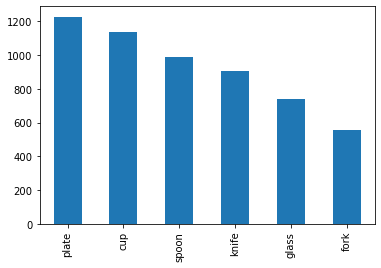

In [27]:
train_labels.label.value_counts().plot(kind='bar')


Showing examples of class: fork


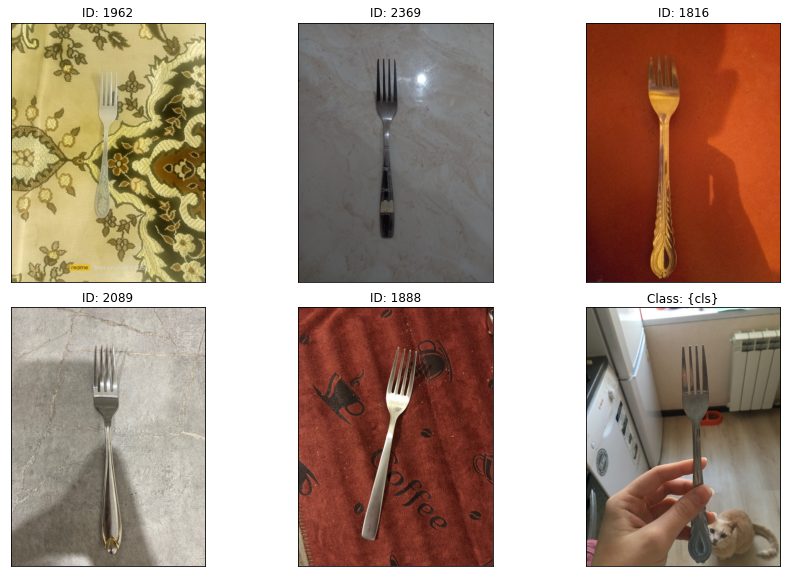

In [28]:


show_train_example('fork')

